In [1]:
# import libraries

import numpy as np; import datetime
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
import matplotlib
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

     Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
0                  39.1               18.7                181.0   
1                  39.5               17.4                186.0   
2                  40.3               18.0                195.0   
3                  36.7               19.3                193.0   
4                  39.3               20.6                190.0   
..                  ...                ...                  ...   
337                47.2               13.7                214.0   
338                46.8               14.3                215.0   
339                50.4               15.7                222.0   
340                45.2               14.8                212.0   
341                49.9               16.1                213.0   

     Body Mass (g)  Delta 15 N (o/oo)  Delta 13 C (o/oo)  cluster   color  
0           3750.0           8.733382         -25.686292        0  purple  
1           3800.0           8.949560      

<Figure size 504x504 with 0 Axes>

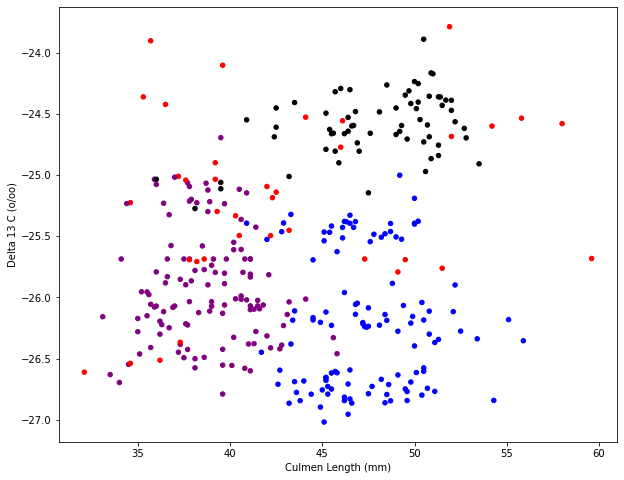

<Figure size 504x504 with 0 Axes>

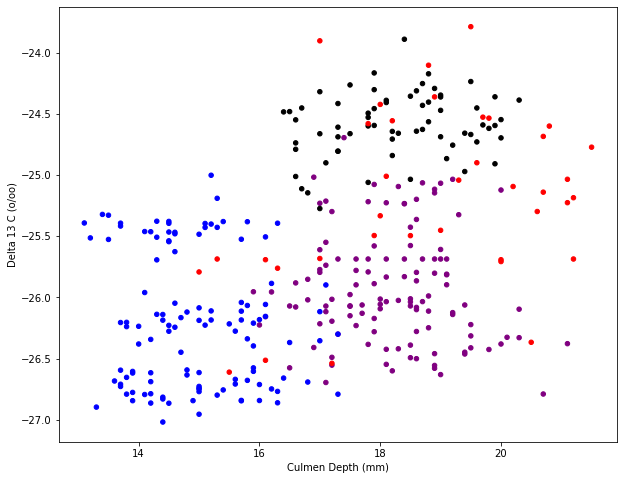

<Figure size 504x504 with 0 Axes>

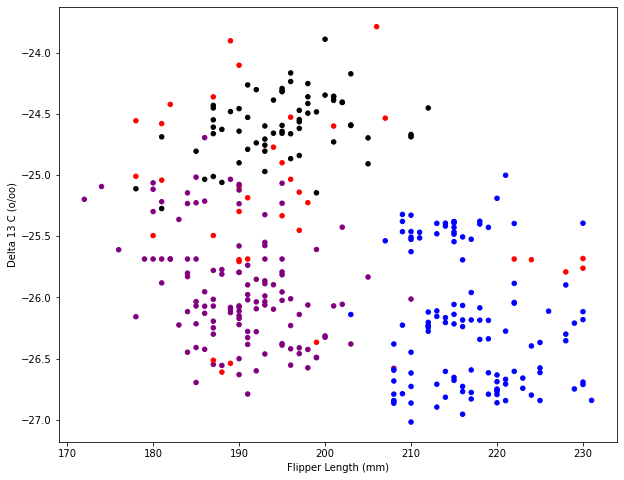

<Figure size 504x504 with 0 Axes>

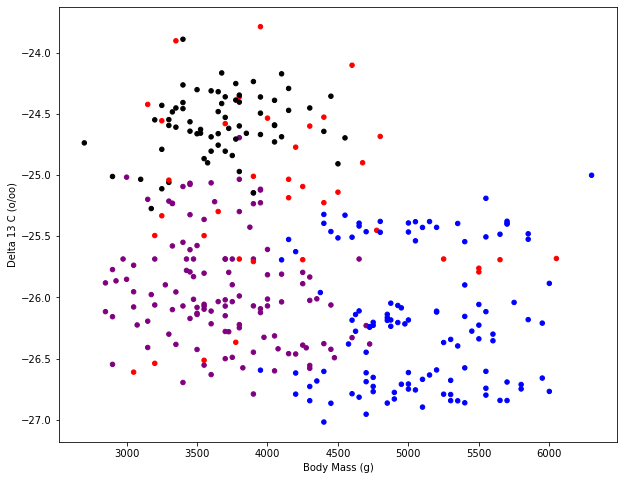

In [2]:
# reading in data
# cleaning data
# plotting dbscan clusters with y as 'Delta 13 C (o/oo)'

animals = pd.read_csv('2021-11-ml-09-k-means-animals-dataset.csv')
filtered_animals = animals._get_numeric_data()
filtered_animals.dropna(axis=0, thresh=4, inplace=True)
filtered_animals[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)','Body Mass (g)',\
    'Delta 15 N (o/oo)','Delta 13 C (o/oo)']] = filtered_animals[['Culmen Length (mm)', 'Culmen Depth (mm)',\
        'Flipper Length (mm)','Body Mass (g)','Delta 15 N (o/oo)','Delta 13 C (o/oo)']].fillna(filtered_animals[['Culmen Length (mm)', \
        'Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)',\
    'Delta 15 N (o/oo)','Delta 13 C (o/oo)']].mean())

filtered_animals.reset_index(drop=True, inplace=True)

ss = StandardScaler()
X = ss.fit_transform(filtered_animals)

X = pd.DataFrame(X)
X.columns = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)','Body Mass (g)',\
    'Delta 15 N (o/oo)','Delta 13 C (o/oo)']


dbscan=DBSCAN(eps=1, min_samples=8).fit(X) 
df_result = pd.DataFrame(dbscan.labels_)

filtered_animals['cluster'] = df_result


for i in filtered_animals.columns[0:4]:

    plt.figure(figsize=(7,7));

    ## Plot scatter by cluster / color, and centroids
    colors = ["purple", "black", "blue", 'red']
    filtered_animals['color'] = filtered_animals['cluster'].map(lambda p: colors[p]);

    ax = filtered_animals.plot(    
        kind="scatter", 
        x=i, y="Delta 13 C (o/oo)",
        figsize=(10,8),
        c = filtered_animals['color']
    );


print(filtered_animals)


     Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
0                  39.1               18.7                181.0   
1                  39.5               17.4                186.0   
2                  40.3               18.0                195.0   
3                  36.7               19.3                193.0   
4                  39.3               20.6                190.0   
..                  ...                ...                  ...   
337                47.2               13.7                214.0   
338                46.8               14.3                215.0   
339                50.4               15.7                222.0   
340                45.2               14.8                212.0   
341                49.9               16.1                213.0   

     Body Mass (g)  Delta 15 N (o/oo)  Delta 13 C (o/oo)  cluster   color  
0           3750.0           8.733382         -25.686292        0  purple  
1           3800.0           8.949560      

<Figure size 504x504 with 0 Axes>

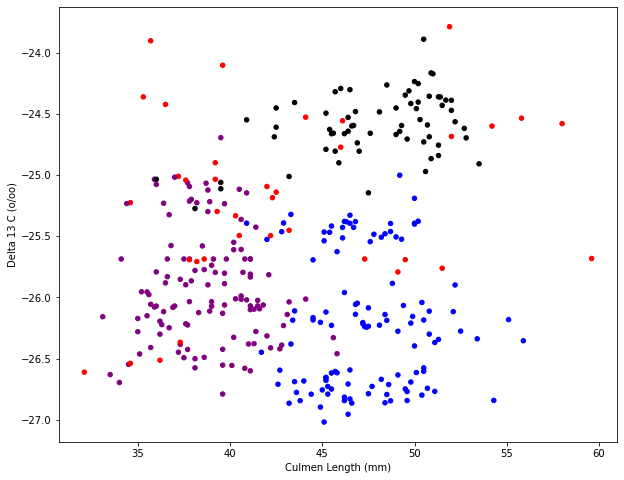

<Figure size 504x504 with 0 Axes>

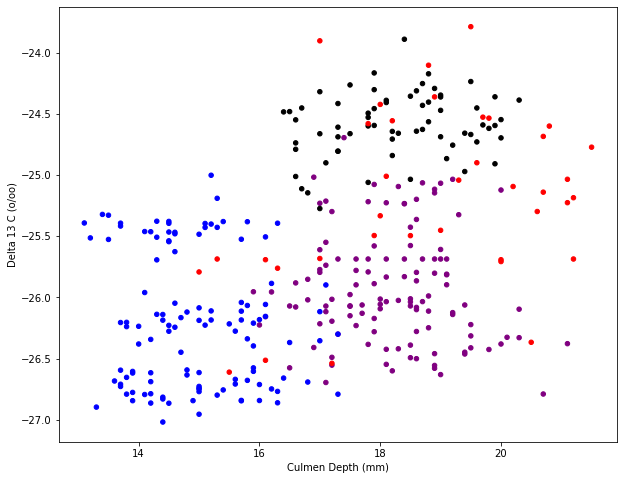

<Figure size 504x504 with 0 Axes>

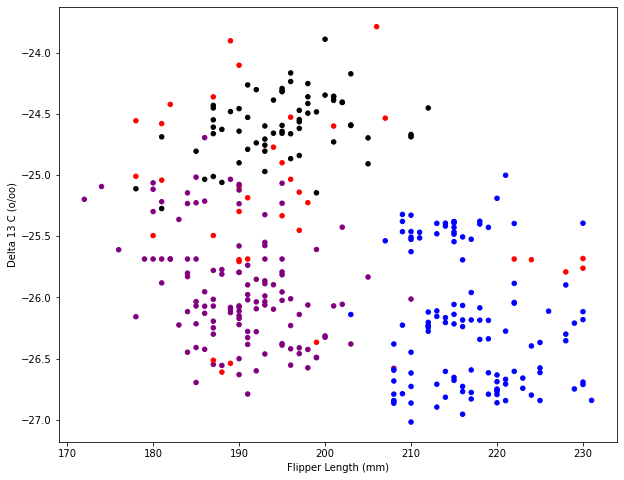

<Figure size 504x504 with 0 Axes>

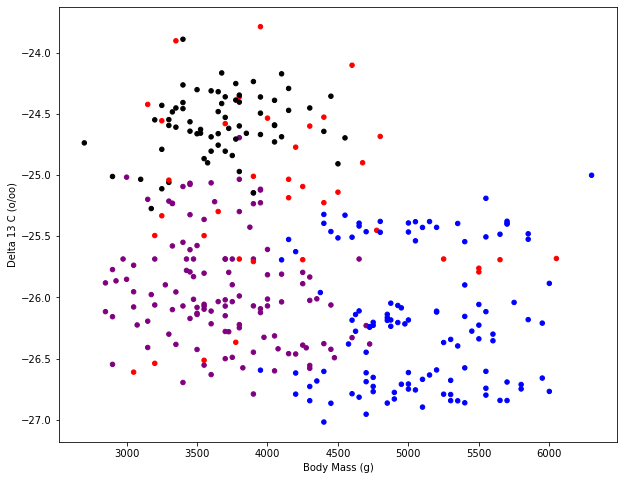

In [3]:
animals = pd.read_csv('2021-11-ml-09-k-means-animals-dataset.csv')
filtered_animals = animals._get_numeric_data()
filtered_animals.dropna(axis=0, thresh=4, inplace=True)
filtered_animals[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)','Body Mass (g)',\
    'Delta 15 N (o/oo)','Delta 13 C (o/oo)']] = filtered_animals[['Culmen Length (mm)', 'Culmen Depth (mm)',\
        'Flipper Length (mm)','Body Mass (g)','Delta 15 N (o/oo)','Delta 13 C (o/oo)']].fillna(filtered_animals[['Culmen Length (mm)', \
        'Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)',\
    'Delta 15 N (o/oo)','Delta 13 C (o/oo)']].mean())

filtered_animals.reset_index(drop=True, inplace=True)

ss = StandardScaler()
X = ss.fit_transform(filtered_animals)

X = pd.DataFrame(X)
X.columns = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)','Body Mass (g)',\
    'Delta 15 N (o/oo)','Delta 13 C (o/oo)']


dbscan=DBSCAN(eps=1, min_samples=8).fit(X) 
df_result = pd.DataFrame(dbscan.labels_)

filtered_animals['cluster'] = df_result


for i in filtered_animals.columns[0:4]:

    plt.figure(figsize=(7,7));

    ## Plot scatter by cluster / color, and centroids
    colors = ["purple", "black", "blue", 'red']
    filtered_animals['color'] = filtered_animals['cluster'].map(lambda p: colors[p]);

    ax = filtered_animals.plot(    
        kind="scatter", 
        x=i, y="Delta 13 C (o/oo)",
        figsize=(10,8),
        c = filtered_animals['color']
    );


print(filtered_animals)

In [4]:
#attempt with kmeans medium article

# animals = pd.read_csv('2021-11-ml-09-k-means-animals-dataset.csv')
# filtered_animals = animals._get_numeric_data()
# filtered_animals.dropna(axis=0, thresh=4, inplace=True)
# filtered_animals[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)','Body Mass (g)',\
#     'Delta 15 N (o/oo)','Delta 13 C (o/oo)']] = filtered_animals[['Culmen Length (mm)', 'Culmen Depth (mm)',\
#         'Flipper Length (mm)','Body Mass (g)','Delta 15 N (o/oo)','Delta 13 C (o/oo)']].fillna(filtered_animals[['Culmen Length (mm)', \
#         'Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)',\
#     'Delta 15 N (o/oo)','Delta 13 C (o/oo)']].mean())

# filtered_animals.reset_index(drop=True, inplace=True)

# ss = StandardScaler()
# X = ss.fit_transform(filtered_animals)

# X = pd.DataFrame(X)
# X.columns = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)','Body Mass (g)',\
#     'Delta 15 N (o/oo)','Delta 13 C (o/oo)']


# dbscan=DBSCAN(eps=1, min_samples=8).fit_predict(X) 
# df_result = pd.DataFrame(dbscan)

# filtered_animals['cluster'] = df_result

# print(filtered_animals)


# plt.scatter(filtered_animals[filtered_animals['cluster']==0, 0], filtered_animals[filtered_animals['cluster']==0, 1], s=100, c='red', label ='Cluster 1')
# plt.scatter(filtered_animals[filtered_animals['cluster']==1, 0], filtered_animals[filtered_animals['cluster']==1, 1], s=100, c='blue', label ='Cluster 2')
# plt.scatter(filtered_animals[filtered_animals['cluster']==2, 0], filtered_animals[filtered_animals['cluster']==2, 1], s=100, c='green', label ='Cluster 3')
# plt.scatter(filtered_animals[filtered_animals['cluster']==-1, 0], filtered_animals[filtered_animals['cluster']==-1, 1], s=100, c='cyan', label ='Cluster 4')



# for i in filtered_animals.columns[0:4]:

#     plt.figure(figsize=(7,7));

#     ## Plot scatter by cluster / color, and centroids
#     colors = ["purple", "black", "blue", 'red']
#     filtered_animals['color'] = filtered_animals['cluster'].map(lambda p: colors[p]);

#     ax = filtered_animals.plot(    
#         kind="scatter", 
#         x=i, y="Delta 13 C (o/oo)",
#         figsize=(10,8),
#         c = filtered_animals['color']
#     );




In [5]:
# impute_mean = SimpleImputer(strategy='mean')
# filtered_animals = pd.DataFrame(impute_mean.fit_transform(filtered_animals))

In [6]:
# dbscan=DBSCAN(eps=.4, min_samples=2.8).fit(X) 
# df_result = pd.DataFrame(dbscan.labels_)
# print(df_result.value_counts())
# X['DBSCAN_labels']=dbscan.labels_ 
# colors=['purple','red','blue','green']
# # Plotting resulting clusters
# plt.figure(figsize=(10,10))
# plt.scatter(X[0],X[1],c=X['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
# plt.title('DBSCAN Clustering',fontsize=20)
# plt.xlabel('Feature 1',fontsize=14)
# plt.ylabel('Feature 2',fontsize=14)
# plt.show()

In [7]:
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

# reducing dimensions attempt
animals = pd.read_csv('2021-11-ml-09-k-means-animals-dataset.csv')
filtered_animals = animals._get_numeric_data()
filtered_animals.dropna(axis=0, thresh=4, inplace=True)
filtered_animals[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)','Body Mass (g)',\
    'Delta 15 N (o/oo)','Delta 13 C (o/oo)']] = filtered_animals[['Culmen Length (mm)', 'Culmen Depth (mm)',\
        'Flipper Length (mm)','Body Mass (g)','Delta 15 N (o/oo)','Delta 13 C (o/oo)']].fillna(filtered_animals[['Culmen Length (mm)', \
        'Culmen Depth (mm)','Flipper Length (mm)','Body Mass (g)',\
    'Delta 15 N (o/oo)','Delta 13 C (o/oo)']].mean())

filtered_animals.reset_index(drop=True, inplace=True)

ss = StandardScaler()
X = ss.fit_transform(filtered_animals)

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
# X_reduced = pd.DataFrame(X_reduced)



In [8]:
dbscan=DBSCAN(eps=.37, min_samples=10).fit_predict(X_reduced) 
df_result = pd.DataFrame(dbscan)
df_result.value_counts()

 2    114
 0    112
-1     64
 1     52
dtype: int64

In [9]:
from sklearn.neighbors import NearestNeighbors

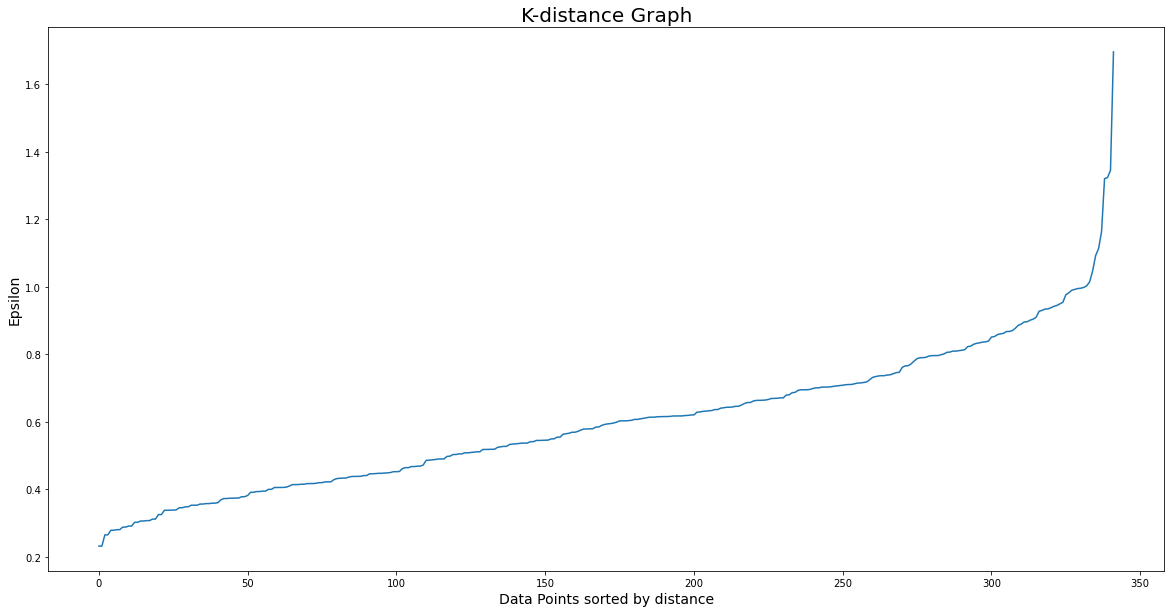

In [10]:
# nearest neighbor elbow on X 

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

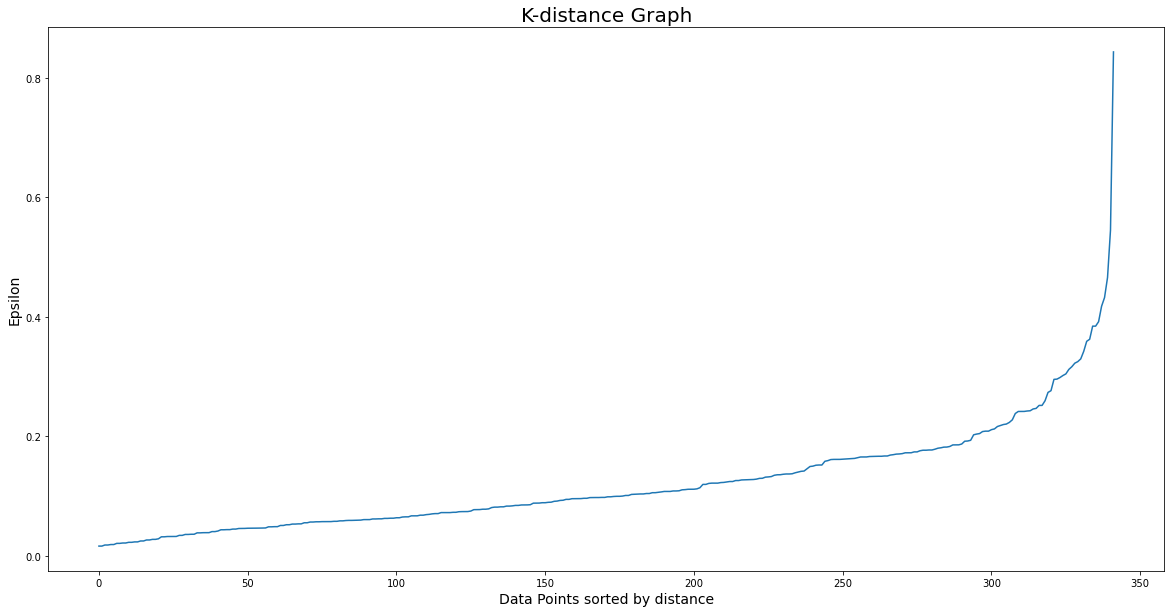

In [11]:
# nearest neighbor elbow on X_reduced

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_reduced)
distances, indices = nbrs.kneighbors(X_reduced)
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

 0    121
 2    118
 1     66
-1     37
dtype: int64


<Figure size 504x504 with 0 Axes>

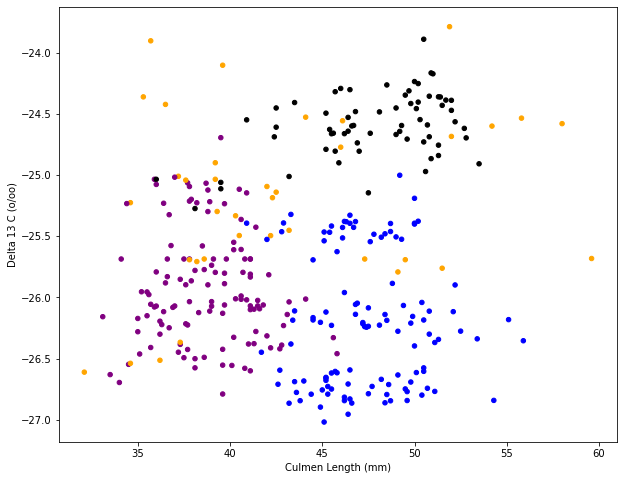

<Figure size 504x504 with 0 Axes>

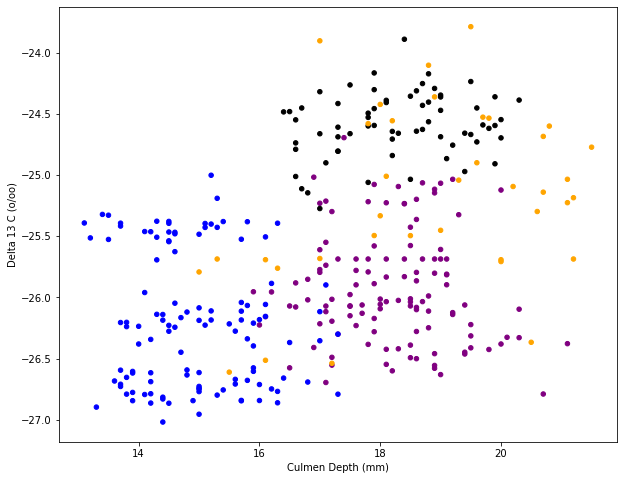

<Figure size 504x504 with 0 Axes>

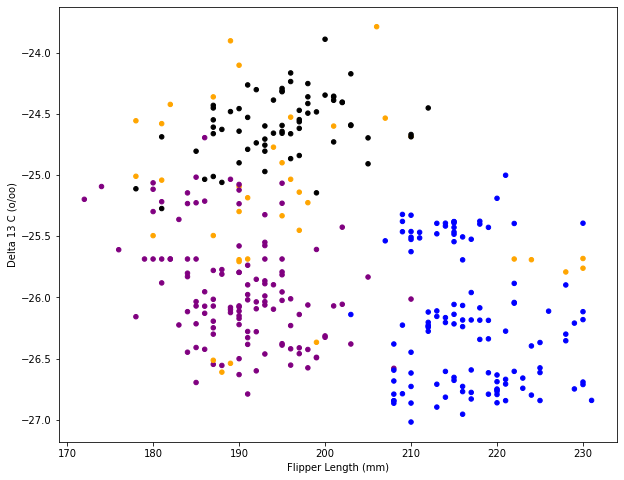

<Figure size 504x504 with 0 Axes>

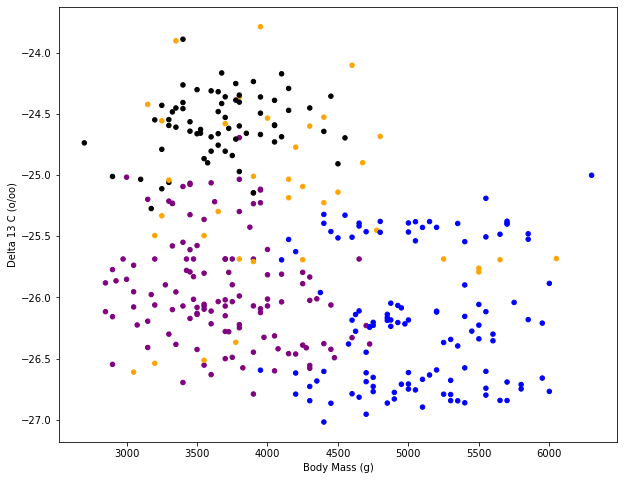

In [12]:
# X fitting and plotting test


dbscan=DBSCAN(eps=1, min_samples=8).fit(X) 
df_result = pd.DataFrame(dbscan.labels_)
print(df_result.value_counts())
len(df_result)


filtered_animals['cluster'] = df_result
# centroids = filtered_animals.groupby(by='cluster').mean()
# filtered_animals.head()


for i in filtered_animals.columns[0:4]:


    plt.figure(figsize=(7,7));

    ## Plot scatter by cluster / color, and centroids
    colors = ["purple", "black", "blue", 'orange']
    filtered_animals['color'] = filtered_animals['cluster'].map(lambda p: colors[p]);

    ax = filtered_animals.plot(    
        kind="scatter", 
        x=i, y="Delta 13 C (o/oo)",
        figsize=(10,8),
        c = filtered_animals['color']
    );

 0    137
 2    120
 1     53
-1     32
dtype: int64


<Figure size 504x504 with 0 Axes>

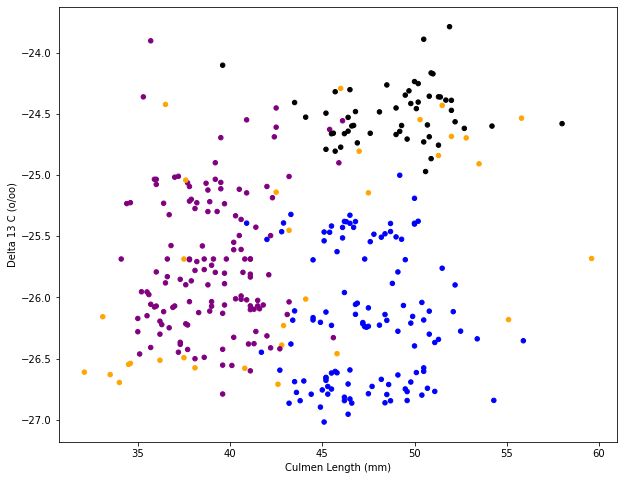

<Figure size 504x504 with 0 Axes>

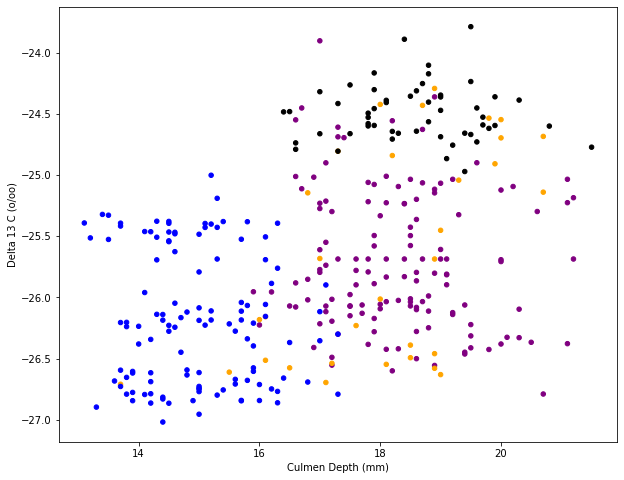

<Figure size 504x504 with 0 Axes>

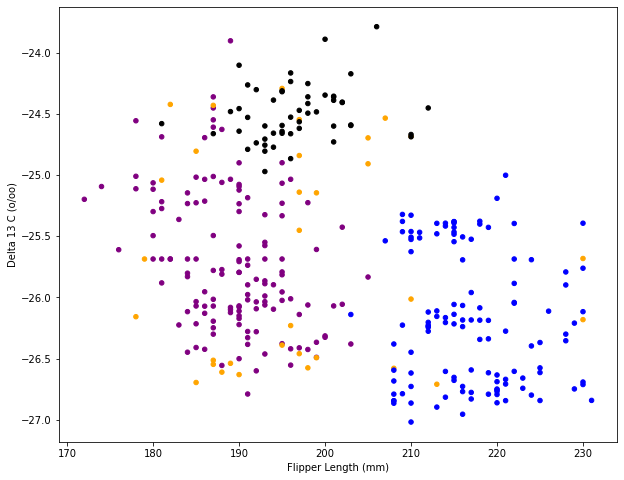

<Figure size 504x504 with 0 Axes>

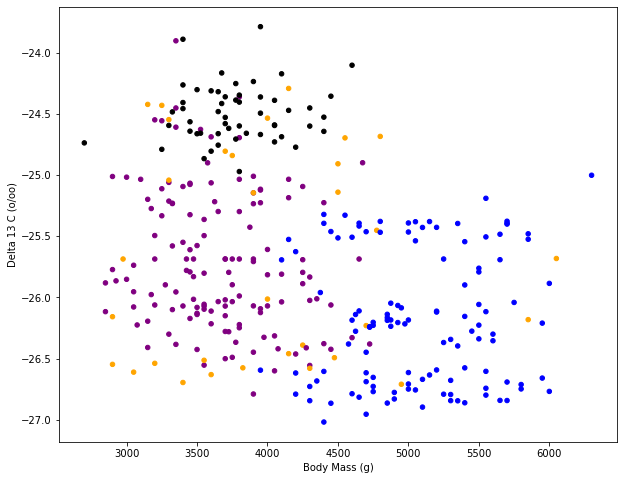

In [13]:
# X_reduced fitting and plotting test

dbscan=DBSCAN(eps=.5, min_samples=14).fit(X_reduced) 
df_result = pd.DataFrame(dbscan.labels_)
print(df_result.value_counts())
len(df_result)


filtered_animals['cluster'] = df_result
# centroids = filtered_animals.groupby(by='cluster').mean()
# filtered_animals.head()


# NOT FINISHED 

for i in filtered_animals.columns[0:4]:
    plt.figure(figsize=(7,7));

    ## Plot scatter by cluster / color, and centroids
    colors = ["purple", "black", "blue", 'orange']
    filtered_animals['color'] = filtered_animals['cluster'].map(lambda p: colors[p]);

    ax = filtered_animals.plot(    
        kind="scatter", 
        x=i, y="Delta 13 C (o/oo)",
        figsize=(10,8),
        c = filtered_animals['color']
    );

In [14]:
#for loop to find out the best min_samples in X?

# epsilon_list = [.1,.3,.4,.5,.7,.9,1,2,3,4,5]

for min_s in range(74):
    print(f'epsilon: 1, min_samples: {min_s}')
    dbscan=DBSCAN(eps=1, min_samples=min_s).fit(X) 
    df_result = pd.DataFrame(dbscan.labels_)
    print(df_result.value_counts())


epsilon: 1, min_samples: 0
0     205
12    122
1       3
6       2
2       1
3       1
4       1
5       1
7       1
8       1
9       1
10      1
11      1
13      1
dtype: int64
epsilon: 1, min_samples: 1
0     205
12    122
1       3
6       2
2       1
3       1
4       1
5       1
7       1
8       1
9       1
10      1
11      1
13      1
dtype: int64
epsilon: 1, min_samples: 2
 0    205
 3    122
-1     10
 1      3
 2      2
dtype: int64
epsilon: 1, min_samples: 3
 0    205
 2    122
-1     12
 1      3
dtype: int64
epsilon: 1, min_samples: 4
 0    205
 1    122
-1     15
dtype: int64
epsilon: 1, min_samples: 5
 0    201
 1    119
-1     22
dtype: int64
epsilon: 1, min_samples: 6
 0    196
 1    119
-1     27
dtype: int64
epsilon: 1, min_samples: 7
 0    190
 1    119
-1     33
dtype: int64
epsilon: 1, min_samples: 8
 0    121
 2    118
 1     66
-1     37
dtype: int64
epsilon: 1, min_samples: 9
 2    118
 0    115
 1     63
-1     46
dtype: int64
epsilon: 1, min_samples: 10
 2

In [15]:
#for loop to find out the best min_samples in X_reduced?

epsilon_list = [.1,.3,.4,.5,.7,.9,1,2,3,4,5]

for epsilon_num in epsilon_list:
    for min_s in range(50):
        print(f'epsilon: {epsilon_num}, min_samples: {min_s}')
        dbscan=DBSCAN(eps=epsilon_num, min_samples=min_s).fit(X_reduced) 
        df_result = pd.DataFrame(dbscan.labels_)
        print(df_result.value_counts())

epsilon: 0.1, min_samples: 0
0      14
155     9
187     8
168     6
8       6
       ..
106     1
107     1
108     1
34      1
220     1
Length: 221, dtype: int64
epsilon: 0.1, min_samples: 1
0      14
155     9
187     8
168     6
8       6
       ..
106     1
107     1
108     1
34      1
220     1
Length: 221, dtype: int64
epsilon: 0.1, min_samples: 2
-1     165
 0      14
 35      9
 49      8
 10      6
 41      6
 3       6
 44      6
 45      5
 18      4
 39      4
 13      4
 54      4
 46      4
 52      3
 24      3
 43      3
 37      3
 31      3
 48      3
 28      3
 42      3
 55      3
 12      3
 19      3
 5       2
 11      2
 9       2
 8       2
 7       2
 6       2
 47      2
 22      2
 40      2
 50      2
 51      2
 2       2
 53      2
 1       2
 4       2
 14      2
 23      2
 38      2
 15      2
 36      2
 16      2
 34      2
 33      2
 32      2
 17      2
 30      2
 29      2
 20      2
 26      2
 25      2
 21      2
 27      2
dtype: int64
e